**Analiza danych dotyczących podróży taksówką za pomocą biblioteki Pandas w Pythonie**

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**Wczytanie surowych danych**

In [137]:
df = pd.read_csv("../input/taxi-dataset/taxi_dataset.csv")

**Podgląd pierwszych 5 wierszy**

In [138]:
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,e2afbb4f62fb3865c4d928a39e8a4d1e711ea8da,5cee8ec7dd48dd171270a4f56ac537aa955fb0404ea5ad...,2017-11-03 11:45:00 UTC,2017-11-03 11:45:00 UTC,365.0,2.3,NaN,NaN,NaN,NaN,...,0.0,7.20,Cash,Metro Group,NaN,NaN,NaN,NaN,NaN,NaN
1,a663e8249660b7a3ae13c9a39378ff495564e8e6,f871ebb01073ef31155285c13e4cfeb91a9f89492e0cbd...,2016-10-28 20:30:00 UTC,2016-10-28 20:30:00 UTC,192.0,1.4,NaN,NaN,NaN,NaN,...,0.0,5.60,Cash,303 Taxi,NaN,NaN,NaN,NaN,NaN,NaN
2,a99a7309aea3cf70eed1644c254eb30b150ac4f2,f871ebb01073ef31155285c13e4cfeb91a9f89492e0cbd...,2016-10-28 20:45:00 UTC,2016-10-28 20:45:00 UTC,328.0,2.1,NaN,NaN,NaN,NaN,...,0.0,7.60,Cash,303 Taxi,NaN,NaN,NaN,NaN,NaN,NaN
3,ad0d9e702d67b0e9e7b85dd0750605ff06389c4f,f871ebb01073ef31155285c13e4cfeb91a9f89492e0cbd...,2016-10-28 21:45:00 UTC,2016-10-28 22:00:00 UTC,706.0,7.6,NaN,NaN,NaN,NaN,...,2.0,22.40,Cash,303 Taxi,NaN,NaN,NaN,NaN,NaN,NaN
4,350b48036f17d07f79abf53d04b811da8b6c264c,f871ebb01073ef31155285c13e4cfeb91a9f89492e0cbd...,2016-10-29 09:45:00 UTC,2016-10-29 10:30:00 UTC,3407.0,50.7,NaN,NaN,NaN,NaN,...,0.0,0.01,Cash,303 Taxi,NaN,NaN,NaN,NaN,NaN,NaN


**Zbadanie ilości rekordów i kolumn**

In [139]:
df.shape

(200000, 23)



Otrzymany zbiór danych zawiera 200 tys. rekordów oraz następujące 23 kolumny: 
       
    1) unique_key - unikatowy klucz dla rekordu
    2) taxi_id - identyfikator taksówki
    3) trip_start_timestamp - data i godzina rozpoczęcia podróży (dokładność do 5min - brak rekordów zawierających dokładny czas, przez co jest pewna rozbieżność przy uwzględnieniu czasu podróży w sekundach) w UTC - uniwersalnym czasie koordynowanym
    4) trip_end_timestamp - data i godzina ukończenia podróży (dokładność taka sama jak w przypadku trip_end_timestamp) w UTC
    5) trip_seconds - czas podróży w sekundach
    6) trip_miles - liczba pokonanych mil z maksymalną dokładnością do  0.01 mili
    7) pickup_census_tract - rejon administracyjny punktu odbioru
    8) dropoff_census_tract - rejon administracyjny punktu dostarczenia
    9) pickup_community_area - obszar wspólnoty punktu odbioru
    10) dropoff_community_area - obszar wspólnoty punktu dostarczenia
    11) fare - opłata za podróż
    12) tips - napiwki
    13) tolls - opłaty drogowe
    14) extras - opłaty dodatkowe
    15) trip_total - całkowita kwota wpłaty
    16) payment_type - rodzaj płatności
    17) company - firma taksówkarska
       Kolumny wskazujące na lokalizację w Chicago:
    18) pickup_latitude - szerokość geograficzna punktu zabrania
    19) pickup_longitude - długość geograficzna punktu zabrania
    20) pickup_location - dokładniejsza lokalizacja punktu zabrania w formacie POINT(longitude, latitude)
    21) dropoff_latitude - szerokość geograficzna punktu dostarczenia
    22) dropoff_longitude - długość geograficzna punktu dostarczenia
    23) dropoff_location - dokładniejsza lokalizacja punktu dostarczenia w formacie POINT(longitude, latitude)

200 000 - liczba rekordów,
23 - liczba kolumn

**Podgląd najważniejszych statystyk dla wszystkich kolumn, gdzie:**
* count - liczba wypełnionych rekordów
* mean - wartość średnia
* std - odchylenie standardowe
* min - wartość minimalna
* 25% - dolny kwartyl
* 50% - mediana
* 75% - górny kwartyl
* max - wartość maksymalna

In [140]:
df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,199957.000000,199989.000000,8.894700e+04,7.795200e+04,170983.000000,126673.000000,199988.000000,199988.000000,169863.000000,199988.000000,199988.000000,170998.000000,170998.000000,126673.000000,126673.000000
mean,1017.396450,5.543039,1.703137e+10,1.703127e+10,27.914453,19.381131,15.666398,1.481971,0.004999,2.107558,19.342440,41.910256,-87.684178,41.894141,-87.637959
std,2151.855247,7.625035,3.366041e+05,1.434936e+05,24.662098,12.422530,41.823396,3.466699,0.485594,5.940803,44.482694,0.046776,0.099087,0.040602,0.023971
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.759857
25%,420.000000,1.300000,1.703108e+10,1.703128e+10,8.000000,8.000000,6.750000,0.000000,0.000000,0.000000,7.650000,41.880994,-87.676356,41.859350,-87.642649
50%,720.000000,2.500000,1.703128e+10,1.703128e+10,24.000000,28.000000,10.000000,0.000000,0.000000,0.000000,11.500000,41.899156,-87.633308,41.879255,-87.634156
75%,1200.000000,7.000000,1.703183e+10,1.703133e+10,32.000000,33.000000,18.750000,2.000000,0.000000,1.000000,21.050000,41.944227,-87.625192,41.909496,-87.630964
max,86340.000000,388.100000,1.703198e+10,1.703184e+10,77.000000,60.000000,9211.590000,199.000000,75.000000,99.500000,9299.250000,42.016046,-87.534903,42.009150,-87.534903


**Podgląd typów danych w kolumnach**

In [141]:
df.dtypes

unique_key                 object
taxi_id                    object
trip_start_timestamp       object
trip_end_timestamp         object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type               object
company                    object
pickup_latitude           float64
pickup_longitude          float64
pickup_location            object
dropoff_latitude          float64
dropoff_longitude         float64
dropoff_location           object
dtype: object

**Utworzenie macierzy korelacji**

In [142]:
correlation_matrix = df.corr()

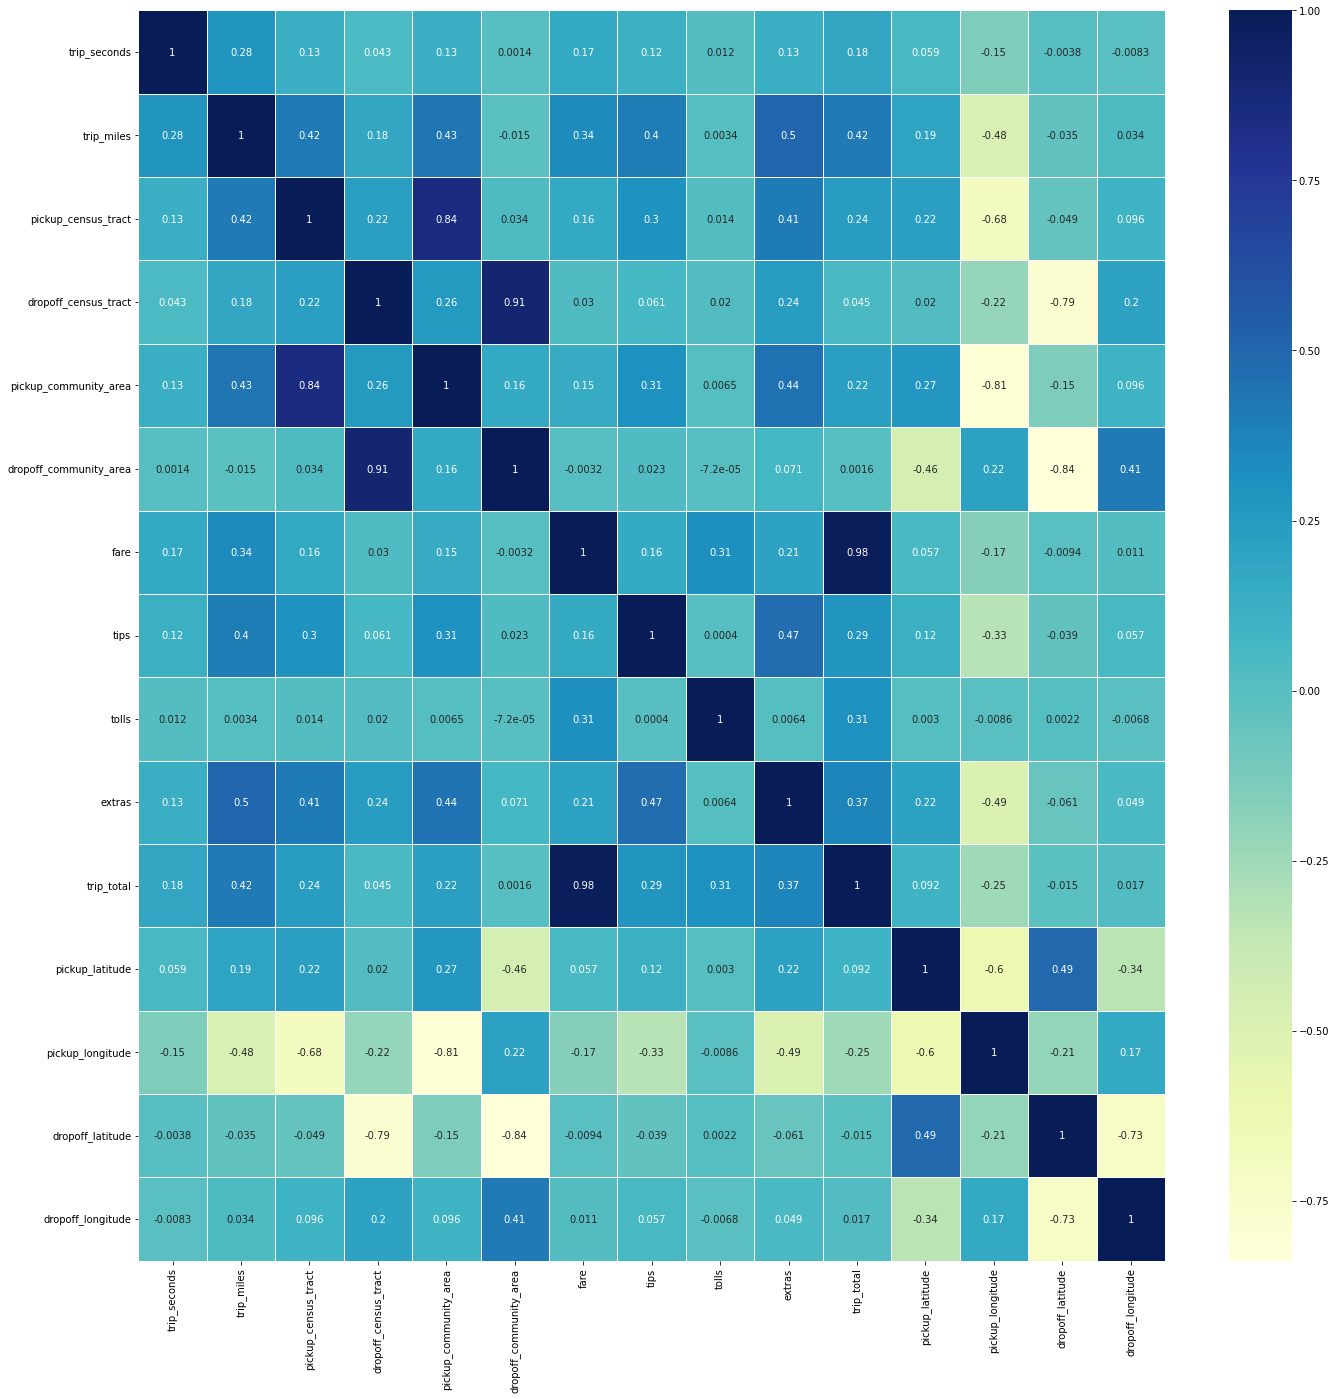

In [143]:
fig, ax = plt.subplots(figsize=(23,23))
ax = sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, linewidths=0.5);

In [144]:
df["trip_start_timestamp"].head()

0    2017-11-03 11:45:00 UTC
1    2016-10-28 20:30:00 UTC
2    2016-10-28 20:45:00 UTC
3    2016-10-28 21:45:00 UTC
4    2016-10-29 09:45:00 UTC
Name: trip_start_timestamp, dtype: object

In [145]:
type(df["trip_start_timestamp"])

pandas.core.series.Series

**Wczytanie zmodyfikowanej tabeli z Excela**
* sprawdzenie duplikatów - brak
* usunięcie niepotrzebnych kolumn - w tym kilka słabo wypełnionych
* podzielenie kolumny trip_start_timestamp na osobne kolumny: trip_start_date i trip_start_time
* utworzenie kolumn: year, month, day_of_the_week

In [146]:
df_mod = pd.read_csv("../input/modtaxi/mod_taxi.csv", sep = ";")

In [147]:
df_mod.head()

,trip_start_date,trip_start_time,time zone,trip_miles,fare,tips,extras,trip_total,payment_type,company,year,month,day_of_the_week
0,03.11.2017,11:45:00,UTC,2.3,7.20,0.0,0.0,7.20,Cash,Metro Group,2017.0,11.0,5.0
1,28.10.2016,20:30:00,UTC,1.4,5.60,0.0,0.0,5.60,Cash,303 Taxi,2016.0,10.0,5.0
2,28.10.2016,20:45:00,UTC,2.1,7.60,0.0,0.0,7.60,Cash,303 Taxi,2016.0,10.0,5.0
3,28.10.2016,21:45:00,UTC,7.6,20.40,0.0,2.0,22.40,Cash,303 Taxi,2016.0,10.0,5.0
4,29.10.2016,09:45:00,UTC,50.7,0.01,0.0,0.0,0.01,Cash,303 Taxi,2016.0,10.0,6.0


**Odczytanie ilości transakcji w danym typie płatności**
* najwięcej transakcji dokonano gotówką - 130 485 rekordów
* w drugiej kolejności najczęściej płacono kartą kredytową - 68 920 rekordów

In [148]:
df_mod["payment_type"].value_counts()

Cash           130485
Credit Card     68920
Prcard            431
Mobile             74
Pcard              65
Split              25
Name: payment_type, dtype: int64

**Odczytanie ilości przejazdów w danym roku**
* przedział lat rekordów 2014-2018
* najwięcej danych z roku 2014 - 91574 rekordy
* najmniej danych z roku 2018 - 1166 rekordów


In [149]:
df_mod["year"].value_counts().sort_index()

2014.0    91574
2016.0    12228
2017.0    84587
2018.0     1166
Name: year, dtype: int64

**Odczytanie ilości przejazdów w danym miesiącu na przestrzeni lat 2014-218**
* zdecydowanie najczęściej korzystano z taksówek w sierpniu - 99 921 rekordów
* najrzadziej korzystano w lutym - 585 rekordów


In [150]:
df_mod["month"].value_counts().sort_index()

1.0      1291
2.0       585
3.0      4175
4.0      4810
5.0      6024
6.0      5099
7.0     27016
8.0     99921
9.0     30698
10.0     5936
11.0     1606
12.0     2394
Name: month, dtype: int64

**Odczytanie ilości przejazdów w danym dniu tygodnia na przestrzeni lat 2014-2018**
* oznaczenia 1-7 to kolejne dni tygodnia od poniedziałku do piątku
* najczęściej zamawiano przejazdy w piątek - 30 174 rekordy
* najrzadziej - w niedzielę - 23 648 rekordów


In [151]:
df_mod["day_of_the_week"].value_counts().sort_index()

1.0    25369
2.0    26857
3.0    26751
4.0    29902
5.0    30174
6.0    26854
7.0    23648
Name: day_of_the_week, dtype: int64

**Odczytanie ilości przejazdów dla każdej z firm**
* usługi taksówkarskie wykonywało aż 28 firm
* najwięcej przejazdów wykonała firma: Chicago Carrage Cab Corp - 18 457 rekordów
* na drugim miejscu: 303 Taxi - 17 705 rekordów


In [152]:
df_mod["company"].value_counts()

Chicago Carriage Cab Corp               18457
303 Taxi                                17705
City Service                             9989
Medallion Leasin                         9306
Taxi Affiliation Service Yellow          8937
Sun Taxi                                 8625
Globe Taxi                               6387
Metro Group                              5986
Yellow Cab                               3148
Nova Taxi Affiliation Llc                3003
Patriot Taxi Dba Peace Taxi Associat     2803
Norshore Cab                             1939
24 Seven Taxi                            1878
Checker Taxi Affiliation                 1802
Chicago Independents                     1241
Flash Cab                                1057
Chicago Taxicab                           911
Blue Diamond                              792
Gold Coast Taxi                           763
Service Taxi Association                  462
Setare Inc                                288
Metro Jet Taxi A                  

In [153]:
df_mod["company"].value_counts().count()

28

In [154]:
df_mod.groupby(["company", "payment_type"])["fare"].mean()

company                          payment_type
24 Seven Taxi                    Cash            13.340750
                                 Credit Card     19.678857
                                 Pcard           14.333333
303 Taxi                         Cash             6.015052
                                 Credit Card      7.777859
                                                   ...    
Taxi Affiliation Service Yellow  Mobile          14.357143
                                 Prcard          12.122951
                                 Split            4.750000
Yellow Cab                       Cash            11.929765
                                 Credit Card     16.229724
Name: fare, Length: 84, dtype: float64

Dodanie kolumny z długością trasy wyrażoną w kilometrach:

In [155]:
df_mod["trip_km"] = df_mod["trip_miles"]/1.609

In [156]:
df_mod.head()

,trip_start_date,trip_start_time,time zone,trip_miles,fare,tips,extras,trip_total,payment_type,company,year,month,day_of_the_week,trip_km
0,03.11.2017,11:45:00,UTC,2.3,7.20,0.0,0.0,7.20,Cash,Metro Group,2017.0,11.0,5.0,1.429459
1,28.10.2016,20:30:00,UTC,1.4,5.60,0.0,0.0,5.60,Cash,303 Taxi,2016.0,10.0,5.0,0.870106
2,28.10.2016,20:45:00,UTC,2.1,7.60,0.0,0.0,7.60,Cash,303 Taxi,2016.0,10.0,5.0,1.305158
3,28.10.2016,21:45:00,UTC,7.6,20.40,0.0,2.0,22.40,Cash,303 Taxi,2016.0,10.0,5.0,4.723431
4,29.10.2016,09:45:00,UTC,50.7,0.01,0.0,0.0,0.01,Cash,303 Taxi,2016.0,10.0,6.0,31.510255


Dodanie kolumny z czasem podróży wyrażonym w minutach:

In [157]:
df_mod["trip_seconds"] = df["trip_seconds"]

In [158]:
df_mod["trip_minutes"] = df_mod["trip_seconds"]/60

In [159]:
df_mod.groupby("month")["trip_minutes", "trip_km"].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,trip_minutes,trip_km
month,,
1.0,11.236290,2.254408
2.0,13.454302,3.354103
3.0,14.885094,4.169377
4.0,28.716424,7.695685
5.0,28.985890,7.557457
6.0,29.637968,7.370302
7.0,17.080592,3.082651
8.0,17.314847,3.291299
9.0,16.543901,3.196814


In [160]:
df_mod.groupby("company")["trip_km"].sum()

company
24 Seven Taxi                            5972.927284
303 Taxi                                52689.434431
5 Star Taxi                                90.242387
American United                            98.197638
American United Taxi Affiliation          580.223741
Blue Diamond                             2396.674953
Checker Taxi                              409.819764
Checker Taxi Affiliation                 4897.799876
Chicago Carriage Cab Corp               61299.136109
Chicago Independents                     4138.036047
Chicago Star Taxicab                      134.120572
Chicago Taxicab                          3222.747048
City Service                            34631.361094
Flash Cab                                2423.182101
Globe Taxi                              21632.715973
Gold Coast Taxi                          2011.373524
Leonard Cab Co                            462.150404
Medallion Leasin                        31417.899316
Metro Group                           

In [161]:
df_mod.groupby("company")["fare"].sum()

company
24 Seven Taxi                            30602.75
303 Taxi                                110506.89
5 Star Taxi                                359.75
American United                            543.25
American United Taxi Affiliation          2728.01
Blue Diamond                             12641.82
Checker Taxi                              2301.25
Checker Taxi Affiliation                 27215.95
Chicago Carriage Cab Corp               310609.40
Chicago Independents                     40054.69
Chicago Star Taxicab                       878.25
Chicago Taxicab                          21137.88
City Service                            173828.12
Flash Cab                                13270.50
Globe Taxi                              110656.50
Gold Coast Taxi                          11051.75
Leonard Cab Co                            2545.75
Medallion Leasin                        163100.41
Metro Group                              55535.81
Metro Jet Taxi A                          

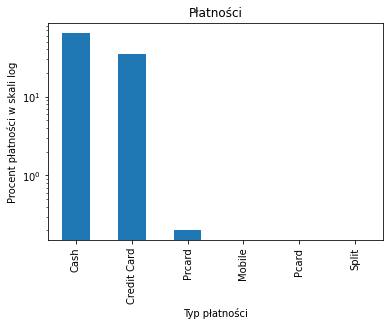

In [162]:
payments_fig = df_mod["payment_type"].value_counts(normalize=True).mul(100).round(1).plot(title = "Płatności", xlabel = "Typ płatności", ylabel = "Procent płatności w skali log", kind = "bar", logy= True).get_figure()
payments_fig.savefig('payments_fig.png')


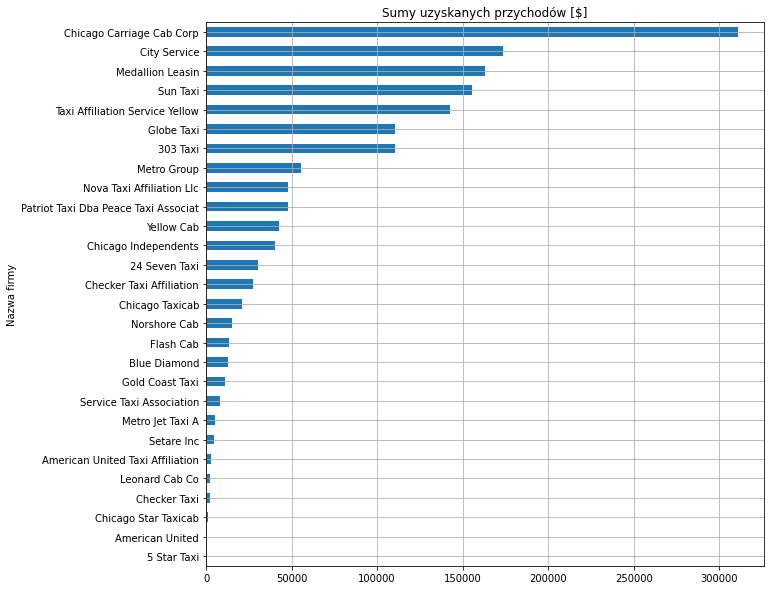

In [163]:
company_fare_fig = df_mod.groupby("company")["fare"].sum().sort_values().plot(title = "Sumy uzyskanych przychodów [$]",
                                                                xlabel = "Nazwa firmy",
                                                                ylabel = "Suma przychodów w $",
                                                                kind = "barh",
                                                                figsize = (10, 10),
                                                                grid = True,
                                                                ).get_figure()
company_fare_fig.savefig('company_fare_fig.png')

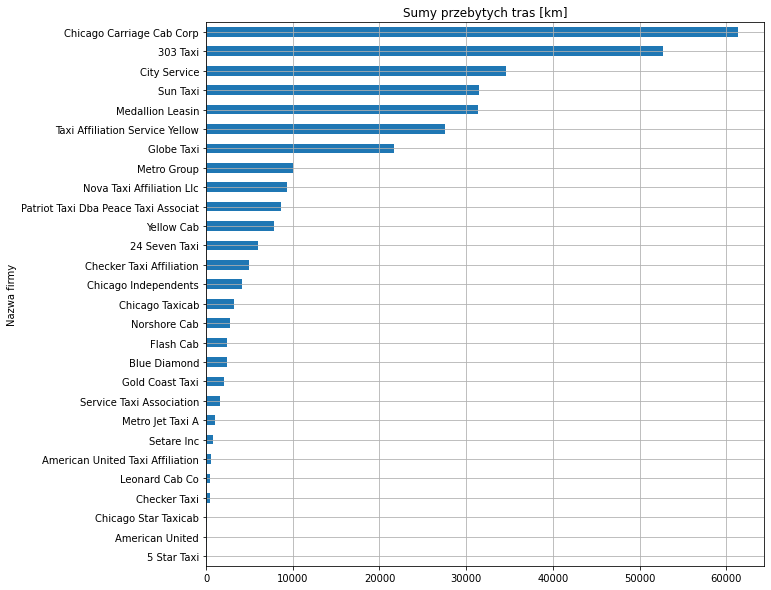

In [164]:
company_km_fig = df_mod.groupby("company")["trip_km"].sum().sort_values().plot(title = "Sumy przebytych tras [km]",
                                                                xlabel = "Nazwa firmy",
                                                                ylabel = "Sumy przebytych tras [km]",
                                                                kind = "barh",
                                                                figsize = (10, 10),
                                                                grid = True,
                                                                ).get_figure()
company_km_fig.savefig('company_km_fig.png')

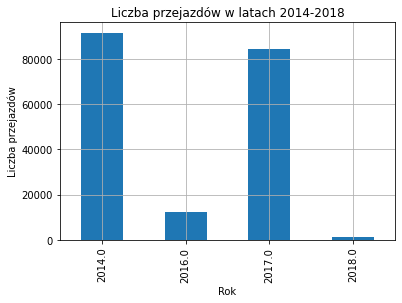

In [165]:
year_count_fig = df_mod["year"].value_counts(sort = False).sort_index().plot(title = "Liczba przejazdów w latach 2014-2018",
                                  xlabel = "Rok",
                                  ylabel = "Liczba przejazdów",
                                  kind = "bar",
                                  grid = True).get_figure()
year_count_fig.savefig('year_count_fig.png')

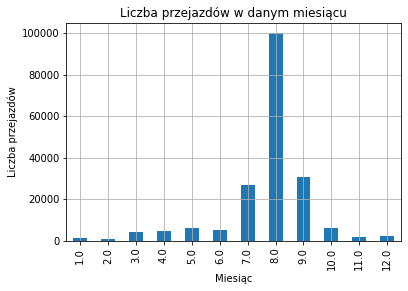

In [166]:
month_count_fig = df_mod["month"].value_counts(sort = False).sort_index().plot(title = "Liczba przejazdów w danym miesiącu",
                                  xlabel = "Miesiąc",
                                  ylabel = "Liczba przejazdów",
                                  kind = "bar",
                                  grid = True).get_figure()
month_count_fig.savefig('month_count_fig.png')

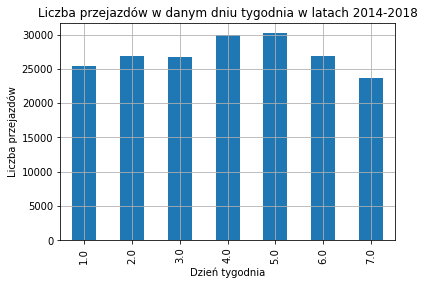

In [167]:
week_count_fig = df_mod["day_of_the_week"].value_counts(sort = False).sort_index().plot(title = "Liczba przejazdów w danym dniu tygodnia w latach 2014-2018",
                                  xlabel = "Dzień tygodnia",
                                  ylabel = "Liczba przejazdów",
                                  kind = "bar",
                                  grid = True).get_figure()
week_count_fig.savefig('week_count_fig.png')

In [168]:
from zipfile import ZipFile
import os

zipObj = ZipFile('myCharts.zip', 'w')

for filename in os.listdir("/kaggle/working"):
    if filename.endswith(".png"):
        zipObj.write(filename)
zipObj.close()

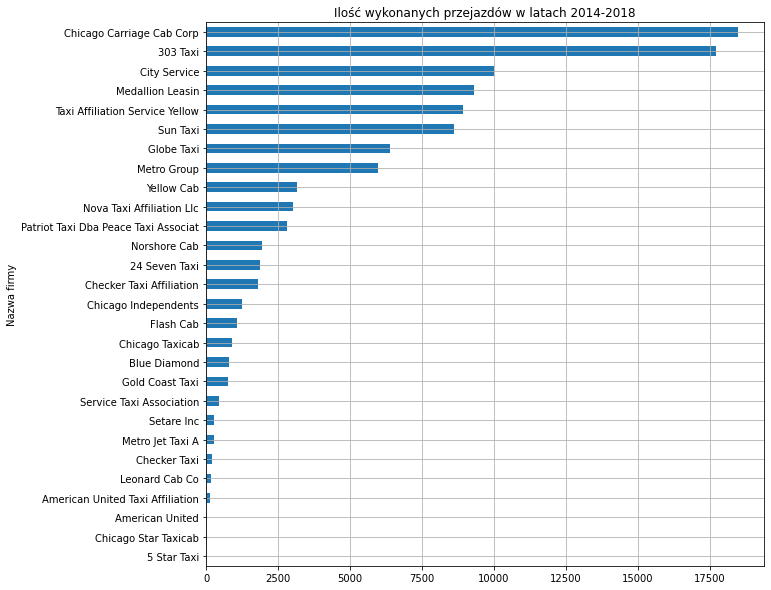

In [171]:
company_count_fig = df_mod["company"].value_counts().sort_values().plot(title = "Ilość wykonanych przejazdów w latach 2014-2018",
                                                                xlabel = "Nazwa firmy",
                                                                ylabel = "Liczba przejezdów",
                                                                kind = "barh",
                                                                figsize = (10, 10),
                                                                grid = True,
                                                                ).get_figure()
company_count_fig.savefig('company_count_fig.png')